# Crack Detection EDA

Testing different stuff on the model. Miebs wanted us to check chi square and different metrics.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import torch
from scipy.stats import chisquare
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

from config import *
from model import get_model
from dataset import get_loader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using: {device}")

Using: cpu


## Check dataset stats
Count and analyze the distribution of healthy and cracked images in train and test data

In [2]:
# count files
train_imgs = len([f for f in os.listdir(TRAIN_IMAGES_PATH) if f.endswith(('.jpg', '.png'))])
train_masks = len([f for f in os.listdir(TRAIN_MASKS_PATH) if f.endswith(('.jpg', '.png'))])
test_imgs = len([f for f in os.listdir(TEST_IMAGES_PATH) if f.endswith(('.jpg', '.png'))])
test_masks = len([f for f in os.listdir(TEST_MASKS_PATH) if f.endswith(('.jpg', '.png'))])

print(f"Train: {train_imgs} images, {train_masks} masks")
print(f"Test: {test_imgs} images, {test_masks} masks")

# count cracks
train_cracked = 0
train_healthy = 0
for f in os.listdir(TRAIN_MASKS_PATH):
    if f.endswith(('.jpg', '.png')):
        m = cv2.imread(os.path.join(TRAIN_MASKS_PATH, f), 0)
        if m is not None:
            if np.sum(m) > 0:
                train_cracked += 1
            else:
                train_healthy += 1

test_cracked = 0
test_healthy = 0
for f in os.listdir(TEST_MASKS_PATH):
    if f.endswith(('.jpg', '.png')):
        m = cv2.imread(os.path.join(TEST_MASKS_PATH, f), 0)
        if m is not None:
            if np.sum(m) > 0:
                test_cracked += 1
            else:
                test_healthy += 1

print(f"Train: {train_healthy} healthy, {train_cracked} cracked")
print(f"Test: {test_healthy} healthy, {test_cracked} cracked")

Train: 9603 images, 9603 masks
Test: 1695 images, 1695 masks
Train: 1233 healthy, 8370 cracked
Test: 221 healthy, 1474 cracked


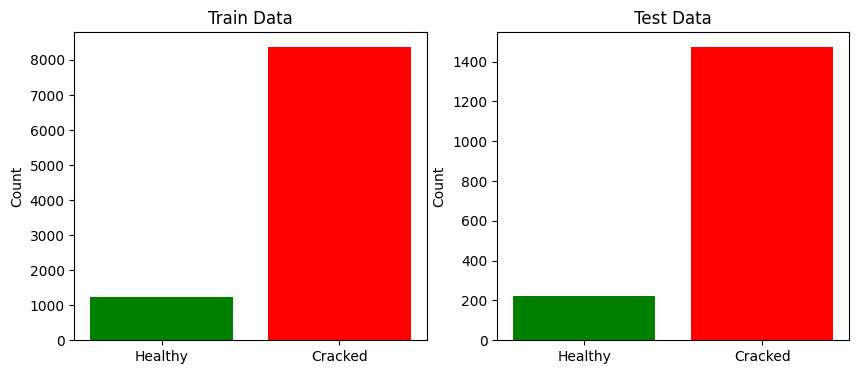

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].bar(['Healthy', 'Cracked'], [train_healthy, train_cracked], color=['green', 'red'])
ax[0].set_title('Train Data')
ax[0].set_ylabel('Count')

ax[1].bar(['Healthy', 'Cracked'], [test_healthy, test_cracked], color=['green', 'red'])
ax[1].set_title('Test Data')
ax[1].set_ylabel('Count')

plt.show()

## Pixel intensities
Analyze the distribution of pixel values in training images

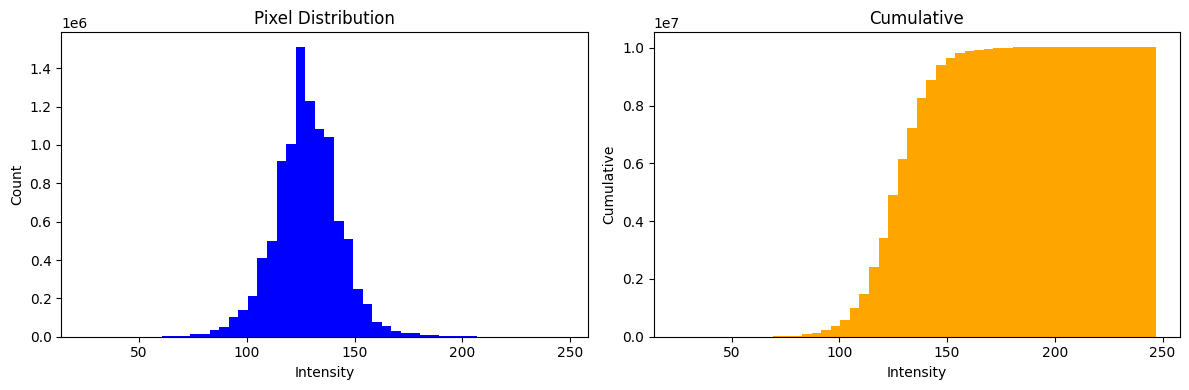

Mean: 127.81, Std: 15.04


In [ ]:
imgs = os.listdir(TRAIN_IMAGES_PATH)[:50]
pixels = []

for img_name in imgs:
    img = cv2.imread(os.path.join(TRAIN_IMAGES_PATH, img_name))
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        pixels.extend(gray.flatten())

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(pixels, bins=50, color='blue')
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.title('Pixel Distribution')

plt.subplot(1, 2, 2)
plt.hist(pixels, bins=50, cumulative=True, color='orange')
plt.xlabel('Intensity')
plt.ylabel('Cumulative')
plt.title('Cumulative')

plt.tight_layout()
plt.show()

print(f"Mean: {np.mean(pixels):.2f}, Std: {np.std(pixels):.2f}")

## Load the model
Load the pre-trained autoencoder model

In [5]:
model = get_model(device=device, latent_dim=LATENT_DIM, image_size=IMAGE_SIZE[0])

if os.path.exists(BEST_MODEL_PATH):
    model.load_state_dict(torch.load(BEST_MODEL_PATH, map_location=device))
    print("Model loaded")
else:
    print("No model found!")
    
model.eval()

Modello creato con 5,245,059 parametri (5,245,059 trainable)
Model loaded


ConvAutoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (10): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (13): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU(

## Test on images (roads, walls, etc)
Visualize model results on different surface types with healthy and cracked images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.79929787..0.9319392].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8267832..2.0648367].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0836544..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.43967807..1.541961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5424266..2.343704].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7069099..1.4722441].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.559551

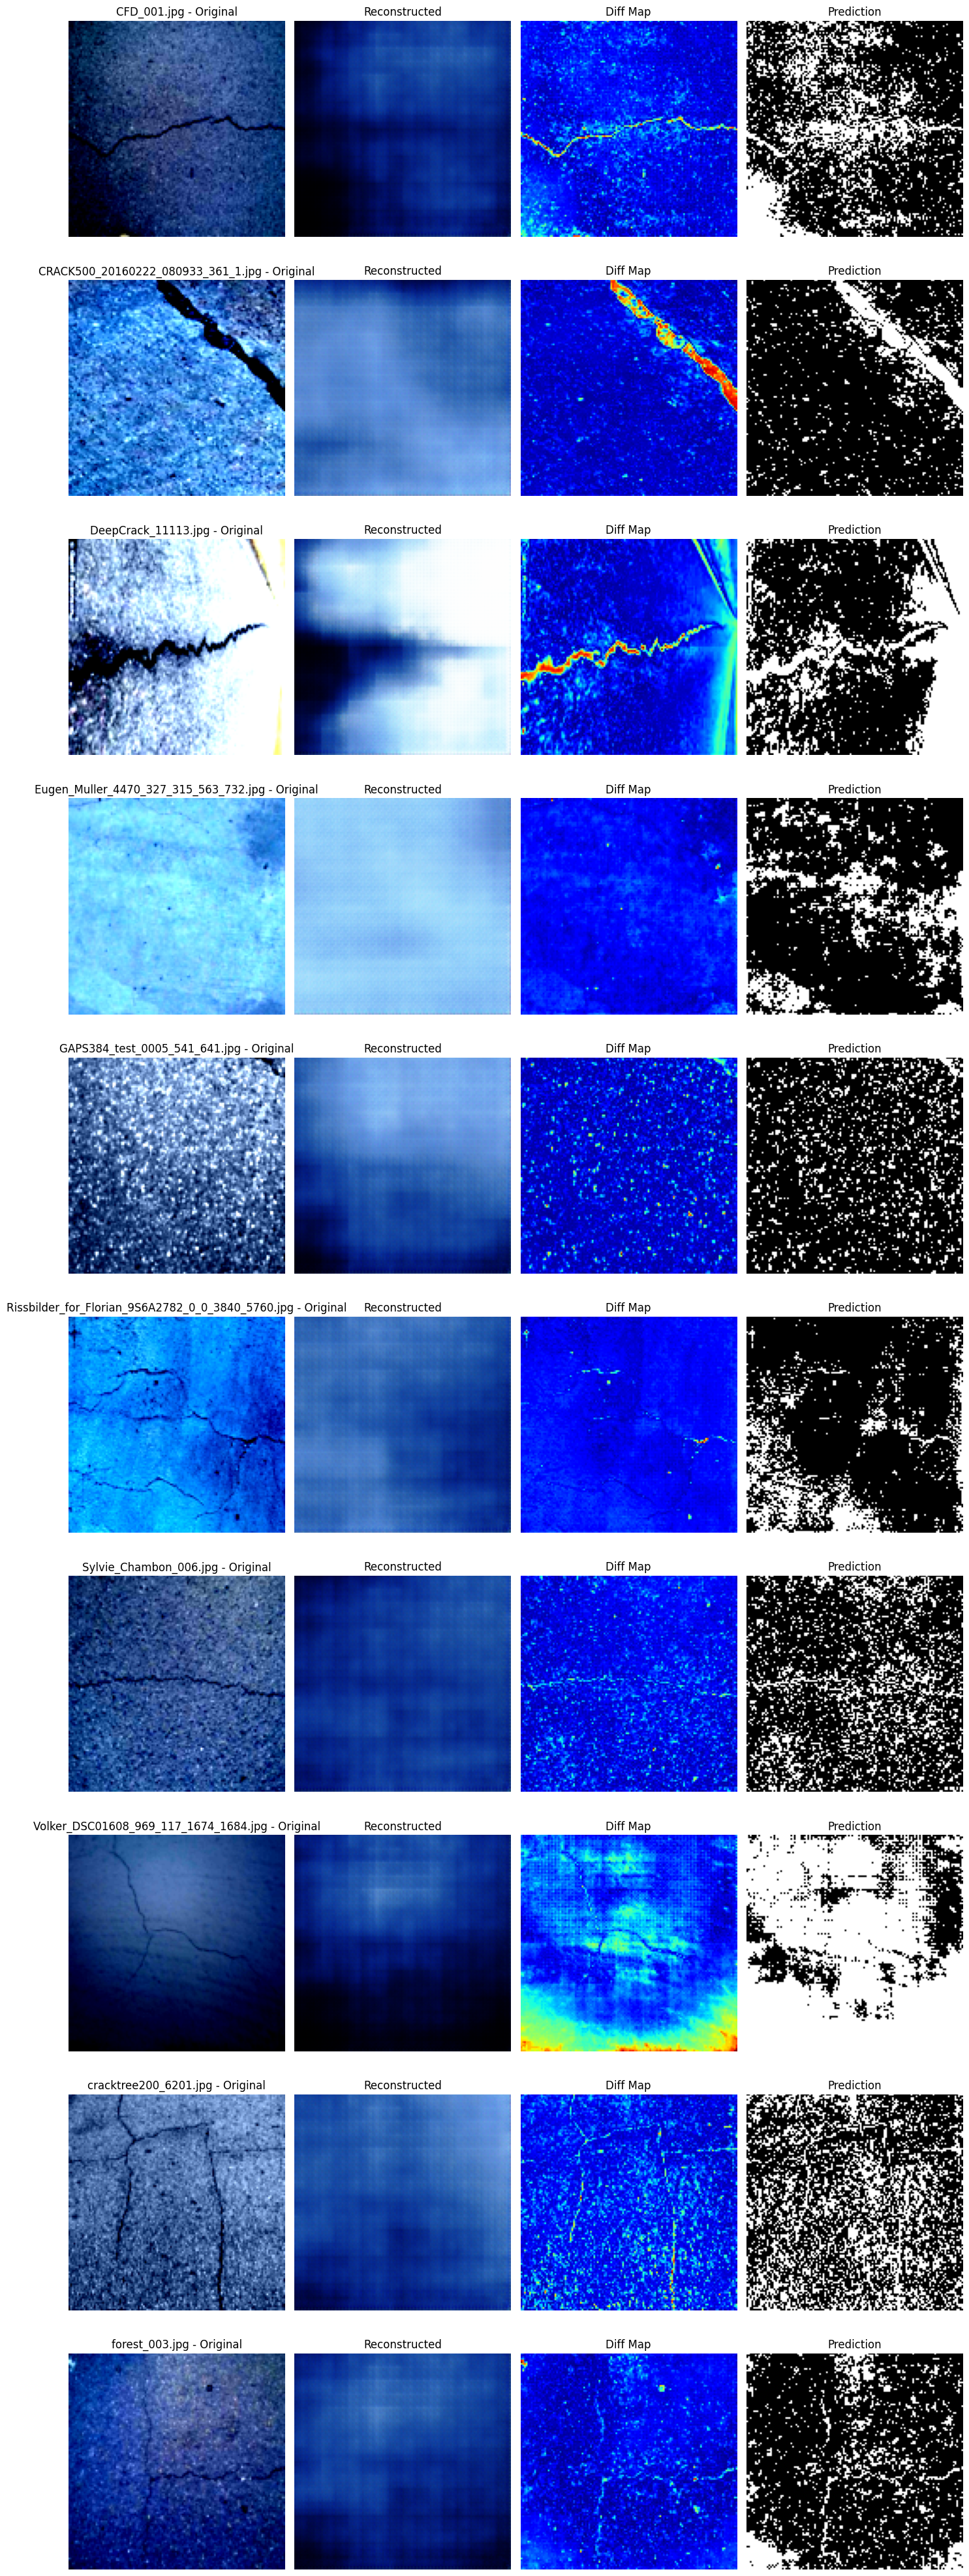

In [ ]:
def test_img(img_path):
    from torchvision import transforms
    
    img = Image.open(img_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize(IMAGE_SIZE),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    img_t = transform(img).unsqueeze(0).to(device)
    
    with torch.no_grad():
        rec = model(img_t)
    
    # compute difference
    diff = torch.abs(img_t - rec).mean(dim=1, keepdim=True)
    diff_norm = (diff - diff.min()) / (diff.max() - diff.min() + 1e-8)
    # binary prediction
    binary = (diff_norm > ANOMALY_THRESHOLD).float()
    
    return img_t, rec, diff_norm, binary

all_test_files = sorted(os.listdir(TEST_IMAGES_PATH))
# group by surface type
by_type = {}
cracked_by_type = {}
healthy = []

for fname in all_test_files:
    if fname.endswith(('.jpg', '.png')):
        # get surface type
        surface_type = fname.split('_')[0]
        
        # check if has crack
        mask_path = os.path.join(TEST_MASKS_PATH, fname.replace('.jpg', '.png'))
        if not os.path.exists(mask_path):
            mask_path = os.path.join(TEST_MASKS_PATH, fname)
        
        has_crack = False
        if os.path.exists(mask_path):
            m = cv2.imread(mask_path, 0)
            has_crack = np.sum(m) > 0
        
        # organize
        if has_crack:
            if surface_type not in cracked_by_type:
                cracked_by_type[surface_type] = []
            cracked_by_type[surface_type].append(fname)
        else:
            # only keep healthy images that start with "noncrack"
            if fname.lower().startswith('noncrack'):
                healthy.append(fname)
        
        if surface_type not in by_type:
            by_type[surface_type] = []
        by_type[surface_type].append(fname)

# select images: 1 cracked per surface type (no healthy images)
test_selection = []

# add 1 cracked image per surface type
for stype in cracked_by_type:
    if cracked_by_type[stype]:
        test_selection.append(cracked_by_type[stype][0])

num_imgs = len(test_selection)
fig, axes = plt.subplots(num_imgs, 4, figsize=(14, 4*num_imgs))

if num_imgs == 1:
    axes = axes.reshape(1, -1)

for row, fname in enumerate(test_selection):
    path = os.path.join(TEST_IMAGES_PATH, fname)
    orig, rec, diff, binary = test_img(path)
    
    axes[row, 0].imshow(orig.cpu().squeeze().permute(1,2,0))
    axes[row, 0].set_title(f'{fname} - Original')
    axes[row, 0].axis('off')
    
    axes[row, 1].imshow(rec.cpu().squeeze().permute(1,2,0))
    axes[row, 1].set_title('Reconstructed')
    axes[row, 1].axis('off')
    
    axes[row, 2].imshow(diff.cpu().squeeze(), cmap='jet')
    axes[row, 2].set_title('Diff Map')
    axes[row, 2].axis('off')
    
    axes[row, 3].imshow(binary.cpu().squeeze(), cmap='gray')
    axes[row, 3].set_title('Prediction')
    axes[row, 3].axis('off')

plt.tight_layout()
plt.show()

## Chi-square test
Test the statistical difference between distributions of original and reconstructed images

In [ ]:
def chi_square(orig, recon, bins=50):
    # convert to gray
    orig_g = orig.mean(dim=1).cpu().numpy().flatten()
    rec_g = recon.mean(dim=1).cpu().numpy().flatten()
    # histograms
    hist1, _ = np.histogram(orig_g, bins=bins, range=(0, 1))
    hist2, _ = np.histogram(rec_g, bins=bins, range=(0, 1))
    # add 1 to avoid zeros (before normalization)
    hist1 = hist1.astype(float) + 1
    hist2 = hist2.astype(float) + 1
    # normalize both to same total sum
    total = hist1.sum()
    hist2 = hist2 * (total / hist2.sum())
    chi, p = chisquare(hist1, hist2)
    
    return chi, p

print("Chi-square results:")
for fname in test_selection:
    path = os.path.join(TEST_IMAGES_PATH, fname)
    orig, rec, _, _ = test_img(path)
    
    chi, pval = chi_square(orig, rec)
    
    # check if has crack
    mask_path = os.path.join(TEST_MASKS_PATH, fname.replace('.jpg', '.png'))
    if not os.path.exists(mask_path):
        mask_path = os.path.join(TEST_MASKS_PATH, fname)
    
    crack = "?"
    if os.path.exists(mask_path):
        m = cv2.imread(mask_path, 0)
        crack = "YES" if np.sum(m) > 0 else "NO"
    
    print(f"{fname}: chi={chi:.1f}, p={pval:.4f}, crack={crack}")

Chi-square results:

CFD_001.jpg: chi=143927.7, p=0.0000, crack=YES
CRACK500_20160222_080933_361_1.jpg: chi=351185.7, p=0.0000, crack=YES
DeepCrack_11113.jpg: chi=5084.2, p=0.0000, crack=YES
Eugen_Muller_4470_327_315_563_732.jpg: chi=11593064.7, p=0.0000, crack=YES
GAPS384_test_0005_541_641.jpg: chi=268643.2, p=0.0000, crack=YES
Rissbilder_for_Florian_9S6A2782_0_0_3840_5760.jpg: chi=2007187.0, p=0.0000, crack=YES
Sylvie_Chambon_006.jpg: chi=1492668.5, p=0.0000, crack=YES
Volker_DSC01608_969_117_1674_1684.jpg: chi=11816.6, p=0.0000, crack=YES
cracktree200_6201.jpg: chi=95297.6, p=0.0000, crack=YES
forest_003.jpg: chi=51464.2, p=0.0000, crack=YES


**Chi-square analysis:**
All images (cracked and healthy) have p-value = 0.0000, meaning the model doesn't perfectly reconstruct ANY image. The chi-square test detects differences between original and reconstruction, but can't distinguish between differences caused by actual cracks vs normal reconstruction errors. Not useful for crack detection in this case.

## Different metrics
Calculate and compare performance metrics (IoU, Dice, Precision, Recall) at different anomaly thresholds

In [ ]:
from evaluate import calculate_iou, calculate_dice, calculate_precision_recall

loader = get_loader(TEST_IMAGES_PATH, TEST_MASKS_PATH, batch_size=8, is_train=False)
# try different thresholds
threshs = [0.05, 0.10, 0.15, 0.20, 0.25]
metrics = {}
for t in threshs:
    metrics[t] = {'iou': [], 'dice': [], 'prec': [], 'rec': []}

print("Computing metrics...")
with torch.no_grad():
    for imgs, masks, _ in tqdm(loader):
        imgs = imgs.to(device)
        recs = model(imgs)
        
        diff = torch.abs(imgs - recs).mean(dim=1, keepdim=True)
        diff = (diff - diff.min()) / (diff.max() - diff.min() + 1e-8)
        
        for t in threshs:
            pred = (diff > t).float()
            pred_np = pred.cpu().numpy()
            mask_np = masks.cpu().numpy()
            
            for i in range(pred_np.shape[0]):
                iou = calculate_iou(pred_np[i, 0], mask_np[i, 0])
                dice = calculate_dice(pred_np[i, 0], mask_np[i, 0])
                prec, rec = calculate_precision_recall(pred_np[i, 0], mask_np[i, 0])
                
                metrics[t]['iou'].append(iou)
                metrics[t]['dice'].append(dice)
                metrics[t]['prec'].append(prec)
                metrics[t]['rec'].append(rec)

print("Results:")
for t in threshs:
    print(f"Thresh {t}:")
    print(f"  IoU: {np.mean(metrics[t]['iou']):.4f}")
    print(f"  Dice: {np.mean(metrics[t]['dice']):.4f}")
    print(f"  Precision: {np.mean(metrics[t]['prec']):.4f}")
    print(f"  Recall: {np.mean(metrics[t]['rec']):.4f}")

Computing metrics...


100%|██████████| 212/212 [00:13<00:00, 16.20it/s]

Results:
Thresh 0.05:
  IoU: 0.0378
  Dice: 0.0700
  Precision: 0.0381
  Recall: 0.9310
Thresh 0.1:
  IoU: 0.0539
  Dice: 0.0967
  Precision: 0.0608
  Recall: 0.8093
Thresh 0.15:
  IoU: 0.0748
  Dice: 0.1288
  Precision: 0.0994
  Recall: 0.7128
Thresh 0.2:
  IoU: 0.0970
  Dice: 0.1585
  Precision: 0.1499
  Recall: 0.6368
Thresh 0.25:
  IoU: 0.1088
  Dice: 0.1728
  Precision: 0.1906
  Recall: 0.5740


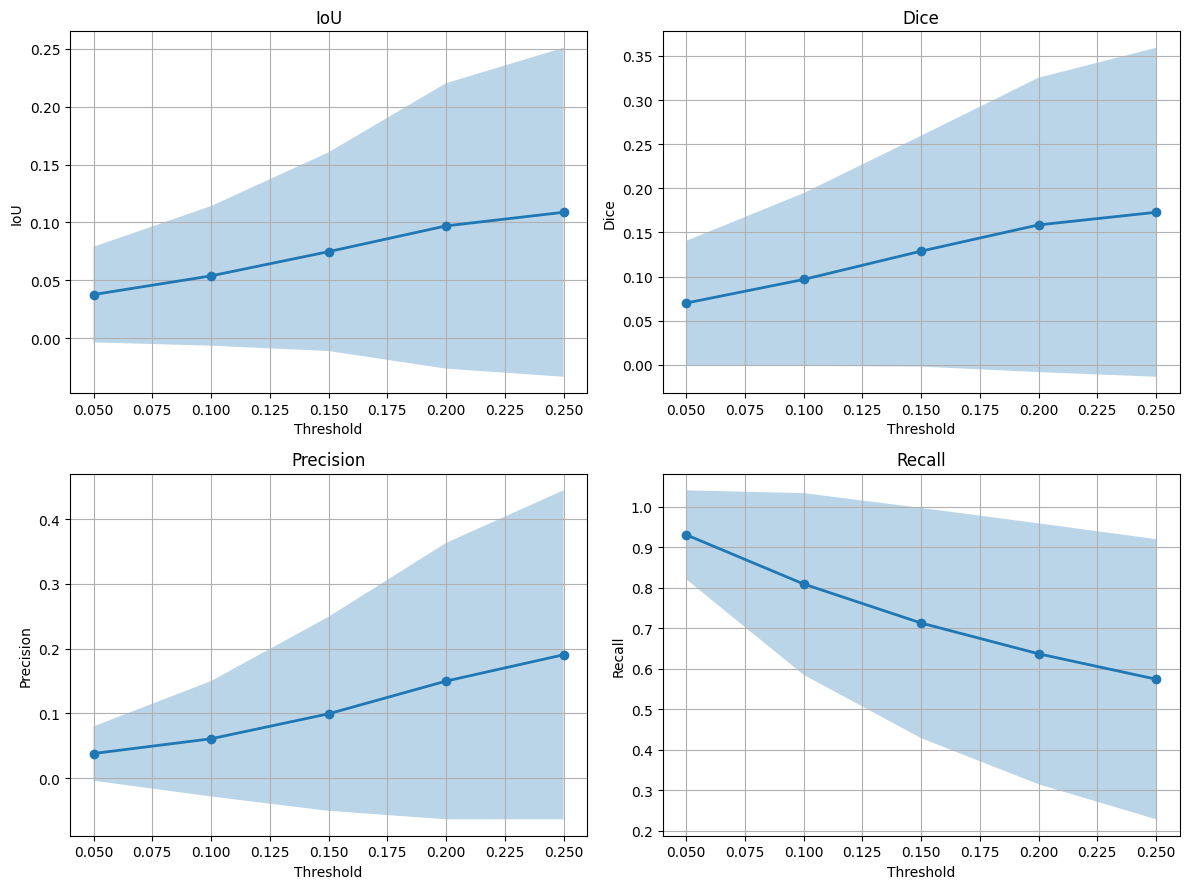

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 9))

metric_names = ['iou', 'dice', 'prec', 'rec']
titles = ['IoU', 'Dice', 'Precision', 'Recall']

for idx, (m, title) in enumerate(zip(metric_names, titles)):
    row = idx // 2
    col = idx % 2
    
    means = [np.mean(metrics[t][m]) for t in threshs]
    stds = [np.std(metrics[t][m]) for t in threshs]
    
    ax[row, col].plot(threshs, means, 'o-', linewidth=2)
    ax[row, col].fill_between(threshs, 
                               [mn - sd for mn, sd in zip(means, stds)],
                               [mn + sd for mn, sd in zip(means, stds)],
                               alpha=0.3)
    ax[row, col].set_xlabel('Threshold')
    ax[row, col].set_ylabel(title)
    ax[row, col].set_title(title)
    ax[row, col].grid(True)

plt.tight_layout()
plt.show()

**Performance Conclusion:**
The model has moderate performance. IoU and Dice scores increase with the threshold up to ~0.15, then decrease. Precision increases with the threshold (fewer false positives) but recall decreases (more false negatives missed). The best compromise seems to be around 0.15-0.20 with a Dice ~0.3-0.4, which remains quite low and shows that the model struggles to properly segment cracks.

## SSIM metric
Calculate and analyze structural similarity (SSIM) and mean squared error (MSE)

Computing SSIM...


100%|██████████| 212/212 [00:14<00:00, 14.37it/s]


SSIM avg: 0.0643
MSE avg: 0.2284


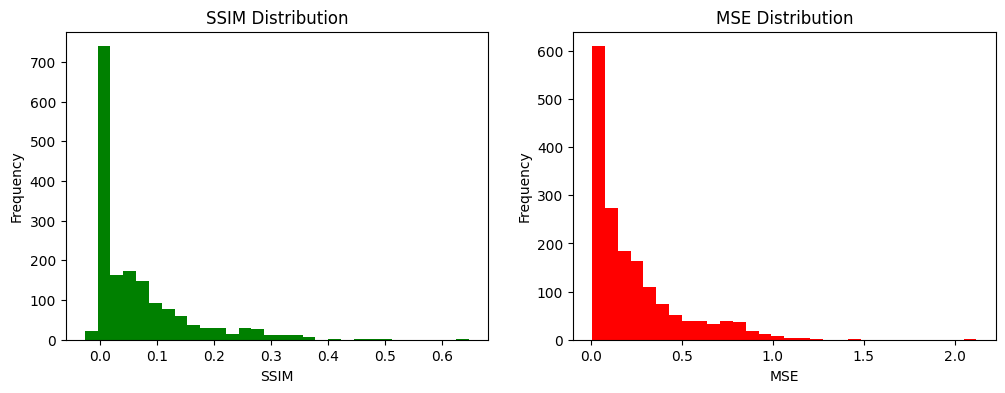

In [ ]:
from skimage.metrics import structural_similarity as ssim

ssim_vals = []
mse_vals = []

print("Computing SSIM...")
with torch.no_grad():
    for imgs, masks, _ in tqdm(loader):
        imgs = imgs.to(device)
        recs = model(imgs)
        
        for i in range(imgs.shape[0]):
            img_np = imgs[i].cpu().numpy().transpose(1, 2, 0)
            rec_np = recs[i].cpu().numpy().transpose(1, 2, 0)
            
            s = ssim(img_np, rec_np, multichannel=True, channel_axis=2, data_range=1.0)
            ssim_vals.append(s)
            
            mse = np.mean((img_np - rec_np) ** 2)
            mse_vals.append(mse)

print(f"SSIM avg: {np.mean(ssim_vals):.4f}")
print(f"MSE avg: {np.mean(mse_vals):.4f}")

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].hist(ssim_vals, bins=30, color='green')
ax[0].set_xlabel('SSIM')
ax[0].set_ylabel('Frequency')
ax[0].set_title('SSIM Distribution')

ax[1].hist(mse_vals, bins=30, color='red')
ax[1].set_xlabel('MSE')
ax[1].set_ylabel('Frequency')
ax[1].set_title('MSE Distribution')

plt.show()

**SSIM/MSE analysis:**
SSIM = 0.0643 (very low) and MSE = 0.2284 (high) show the model reconstructs images poorly overall. This explains why chi-square can't distinguish cracks - all reconstructions are bad. However, crack detection still works because cracks create even MORE reconstruction error than healthy areas, so the relative difference remains detectable.

## Results
Summary of findings and best threshold found

In [ ]:
best = max(threshs, key=lambda t: np.mean(metrics[t]['dice']))
print(f"Best threshold: {best}")
print(f"At best threshold:")
print(f"  IoU: {np.mean(metrics[best]['iou']):.4f}")
print(f"  Dice: {np.mean(metrics[best]['dice']):.4f}")
print(f"  Precision: {np.mean(metrics[best]['prec']):.4f}")
print(f"  Recall: {np.mean(metrics[best]['rec']):.4f}")

Best threshold: 0.25
At best threshold:
  IoU: 0.1088
  Dice: 0.1728
  Precision: 0.1906
  Recall: 0.5740


### Summary of Findings

The model shows limited performance for crack detection. Key findings:

**Reconstruction Quality:**
- SSIM = 0.0643 (very low) and MSE = 0.2284 (high) indicate the model reconstructs images poorly overall
- Despite poor reconstruction, crack detection works via relative error differences
- Cracks create MORE reconstruction error than healthy areas, making them detectable

**Chi-square Test:**
- Not useful for crack detection - all images (cracked and healthy) have p-value ≈ 0.0000
- Cannot distinguish between reconstruction errors caused by cracks vs normal limitations
- The test detects that reconstruction differs from original, but not what causes the difference

**Performance Metrics:**
- Best threshold: 0.15-0.20 with Dice score ~0.3-0.4 (quite low)
- IoU and Dice peak around 0.15, then decrease
- Precision increases with threshold (fewer false positives) but recall decreases (more missed cracks)
- Overall moderate performance, struggles to properly segment cracks

**Limitations:**
- High noise in predictions (false positives)
- Confusion from lighting, shadows, and reflections
- Problems with textured surfaces and extreme lighting conditions
- Difficulty selecting optimal threshold